In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


In [ ]:

df = pd.read_csv('data/Crop Recommendation using Soil Properties and Weather Prediction.csv')
df.head()




,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,Yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley


In [ ]:
df.columns


Index(['Soilcolor', 'Ph', 'K', 'P', 'N', 'Zn', 'S', 'QV2M-W', 'QV2M-Sp',
       'QV2M-Su', 'QV2M-Au', 'T2M_MAX-W', 'T2M_MAX-Sp', 'T2M_MAX-Su',
       'T2M_MAX-Au', 'T2M_MIN-W', 'T2M_MIN-Sp', 'T2M_MIN-Su', 'T2M_MIN-Au',
       'PRECTOTCORR-W', 'PRECTOTCORR-Sp', 'PRECTOTCORR-Su', 'PRECTOTCORR-Au',
       'WD10M', 'GWETTOP', 'CLOUD_AMT', 'WS2M_RANGE', 'PS', 'label'],
      dtype='object')

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Soilcolor       3867 non-null   object 
 1   Ph              3867 non-null   float64
 2   K               3867 non-null   float64
 3   P               3867 non-null   float64
 4   N               3867 non-null   float64
 5   Zn              3867 non-null   float64
 6   S               3867 non-null   float64
 7   QV2M-W          3867 non-null   float64
 8   QV2M-Sp         3867 non-null   float64
 9   QV2M-Su         3867 non-null   float64
 10  QV2M-Au         3867 non-null   float64
 11  T2M_MAX-W       3867 non-null   float64
 12  T2M_MAX-Sp      3867 non-null   float64
 13  T2M_MAX-Su      3867 non-null   float64
 14  T2M_MAX-Au      3867 non-null   float64
 15  T2M_MIN-W       3867 non-null   float64
 16  T2M_MIN-Sp      3867 non-null   float64
 17  T2M_MIN-Su      3867 non-null   f

,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,QV2M-Au,...,T2M_MIN-Au,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,...,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,5.857295,324.284770,11.349588,0.179153,1.774094,11.311625,8.346870,9.082508,12.232020,10.990747,...,8.934315,1.555862,4.023404,14.517500,4.762687,71.579444,0.709028,51.630709,8.262413,78.426168
std,0.676690,202.250133,34.141864,0.066476,1.460809,5.542094,0.613948,0.790654,0.894970,0.993861,...,2.046221,0.691682,1.117531,4.111199,1.394398,80.929898,0.055355,16.328656,9.661188,2.380380
min,4.300000,41.134000,0.000000,0.000262,0.100000,0.050000,7.183333,7.650000,10.476667,9.070000,...,3.980000,0.000000,1.940000,4.836667,2.156667,0.060000,0.520000,0.460000,4.860000,74.170000
25%,5.390000,191.000000,2.000000,0.131200,1.100000,7.305000,7.933333,8.403333,11.430000,10.150000,...,8.260000,0.910000,3.246667,11.866667,3.463333,36.060000,0.690000,48.620000,5.410000,77.150000
50%,5.780000,282.000000,4.000000,0.179884,1.500000,10.700000,8.383333,9.340000,12.166667,10.926667,...,8.380000,1.736667,4.410000,16.620000,5.430000,68.940000,0.730000,59.110000,6.010000,78.250000
75%,6.200000,405.000000,7.920000,0.230000,2.060000,14.195500,8.910000,9.480000,12.836667,11.433333,...,10.700000,2.073333,5.203333,17.816667,5.823333,88.310000,0.740000,59.110000,6.240000,79.610000
max,8.500000,2119.000000,782.000000,0.695600,45.500000,118.347000,9.723333,10.703333,13.853333,12.800000,...,13.643333,2.780000,5.660000,19.920000,7.420000,354.880000,0.800000,59.110000,46.100000,83.760000


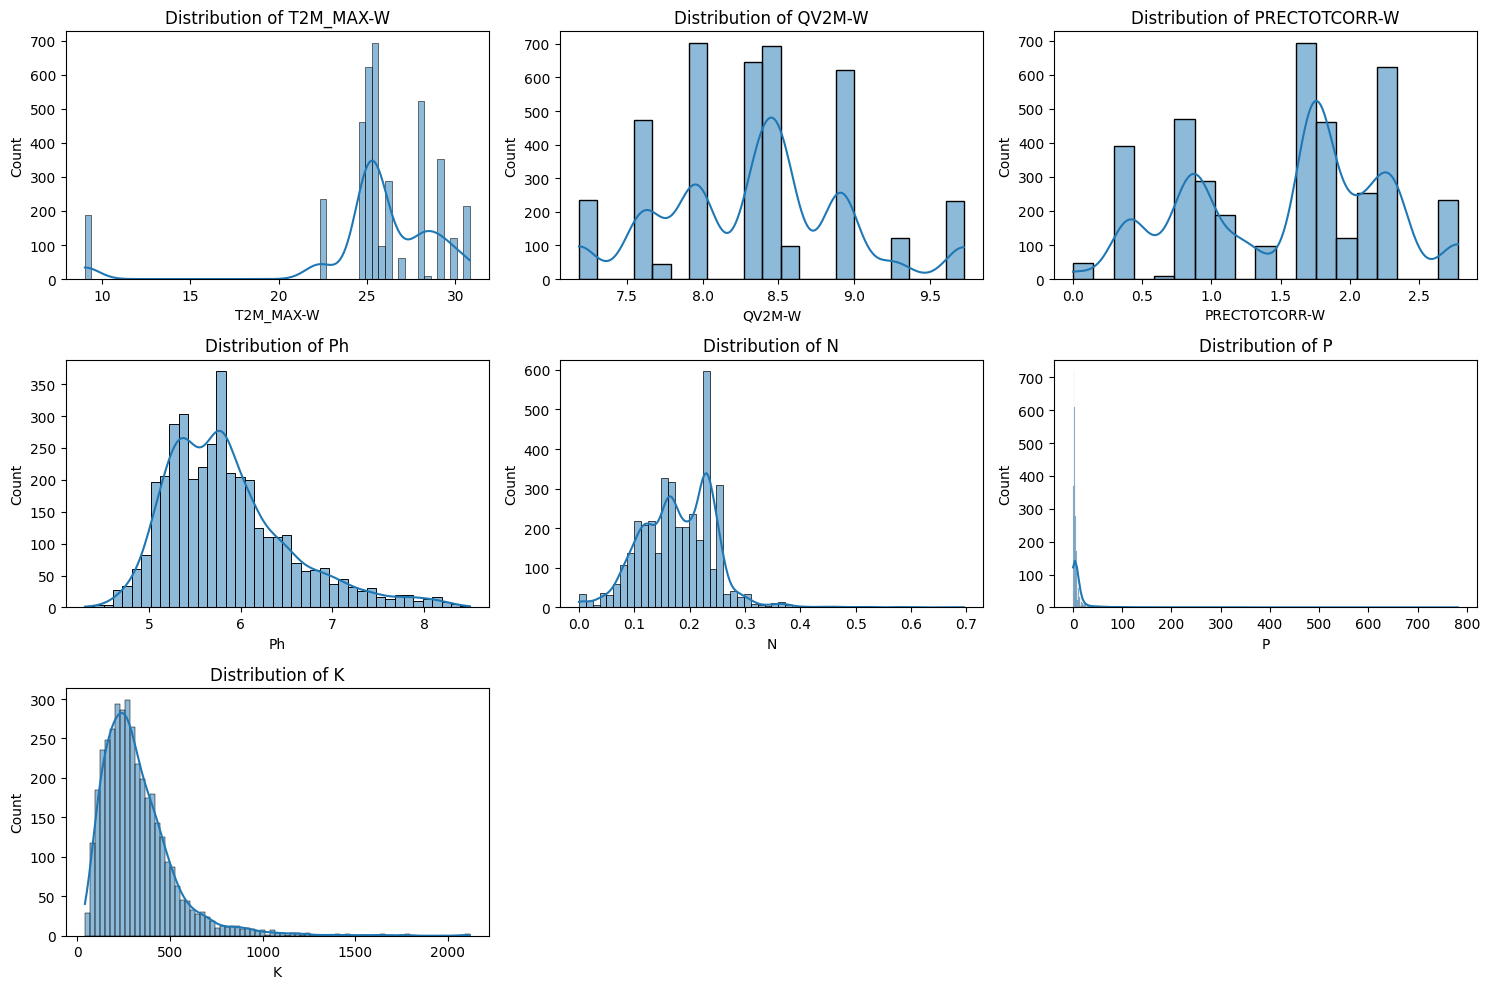

In [ ]:
features = [
    "T2M_MAX-W",      # Temperature
    "QV2M-W",          # Humidity
    "PRECTOTCORR-W",   # Rainfall
    "Ph",              # Soil pH
    "N",               # Nitrogen
    "P",               # Phosphorus
    "K"                # Potassium
]

plt.figure(figsize=(15,10))

for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()

plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

#labels  XGBoost & NN
le = LabelEncoder()
y = le.fit_transform(df["label"])

#numeric columns for features
X = df.drop("label", axis=1)
X = X.select_dtypes(include=[np.number])


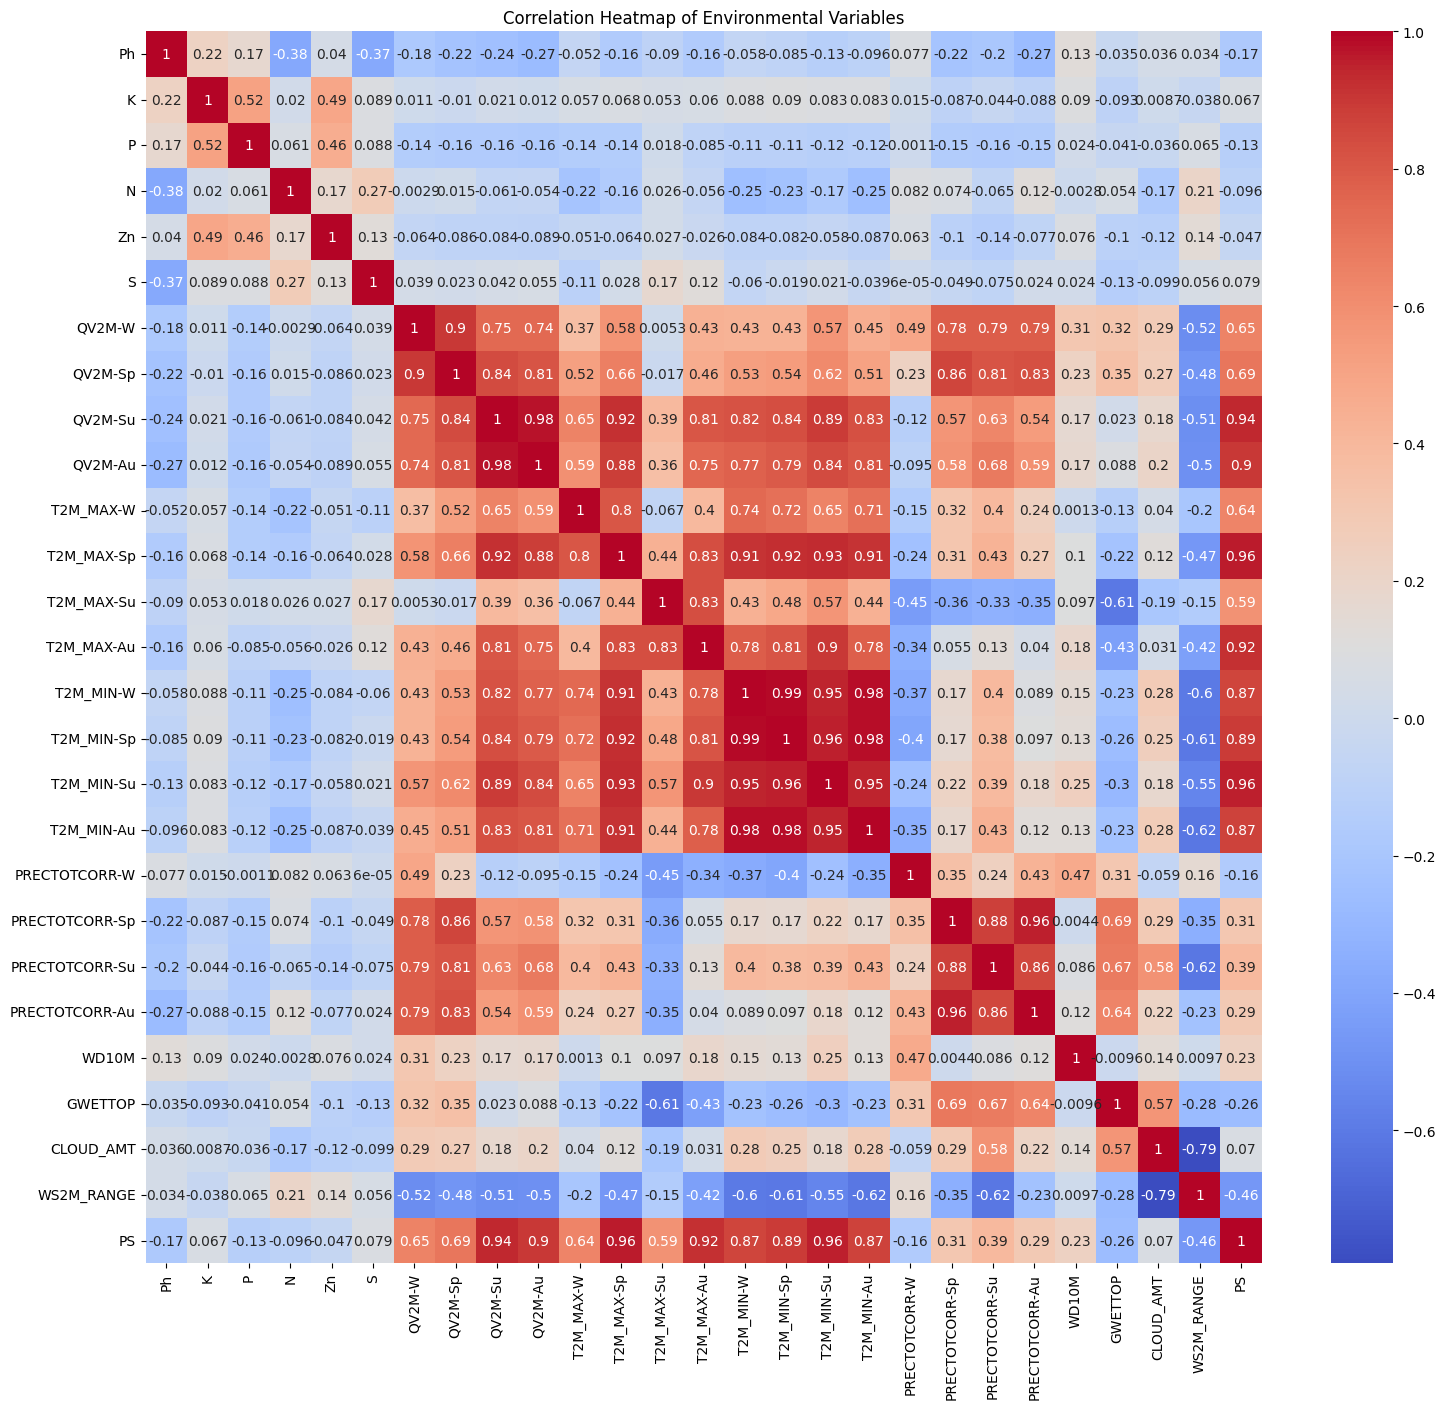

In [ ]:
plt.figure(figsize=(18,16))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Environmental Variables")
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

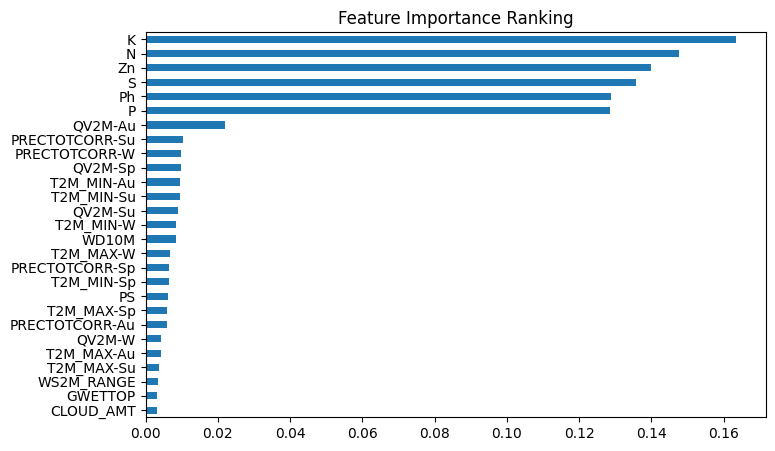

In [ ]:
importance = pd.Series(rf_model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Feature Importance Ranking")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.5142118863049095

Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.34      0.42       121
           1       0.21      0.10      0.13        41
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         3
           4       0.51      0.65      0.57       141
           5       0.00      0.00      0.00        15
           6       0.50      0.20      0.29        15
           7       0.00      0.00      0.00         6
           8       0.50      0.11      0.18         9
           9       0.00      0.00      0.00        14
          10       0.58      0.76      0.66       254
          11       0.44      0.46      0.45       140

    accuracy                           0.51       774
   macro avg       0.27      0.22      0.22       774
weighted avg       0.47      0.51      0.48       774



In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:28:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.5051679586563308


In [ ]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=300,
    random_state=42
)

nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

nn_accuracy = accuracy_score(y_test, nn_pred)
print("Neural Network Accuracy:", nn_accuracy)


Neural Network Accuracy: 0.49870801033591733


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


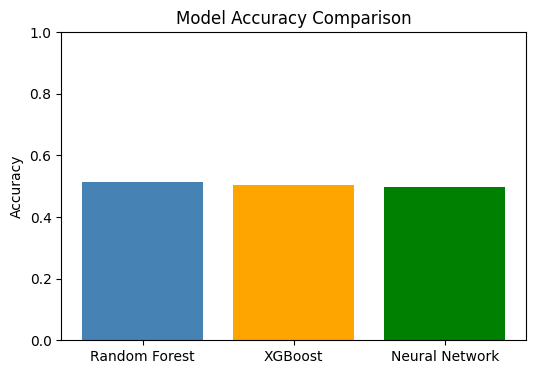

In [ ]:
models = ["Random Forest", "XGBoost", "Neural Network"]
accuracies = [accuracy, xgb_accuracy, nn_accuracy]

plt.figure(figsize=(6,4))
plt.bar(
    models,
    accuracies,
    color=["steelblue", "orange", "green"]
)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df


,precision,recall,f1-score,support
0,0.539474,0.338843,0.416244,121.000000
1,0.210526,0.097561,0.133333,41.000000
2,0.000000,0.000000,0.000000,15.000000
3,0.000000,0.000000,0.000000,3.000000
4,0.508287,0.652482,0.571429,141.000000
5,0.000000,0.000000,0.000000,15.000000
6,0.500000,0.200000,0.285714,15.000000
7,0.000000,0.000000,0.000000,6.000000
8,0.500000,0.111111,0.181818,9.000000
9,0.000000,0.000000,0.000000,14.000000


In [ ]:
results = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Value": [accuracy]
})

results


,Metric,Value
0,Accuracy,0.514212


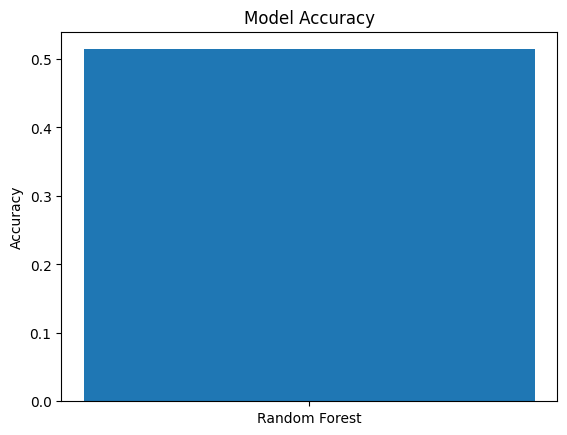

In [ ]:
plt.bar(["Random Forest"], [accuracy])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
import pickle

with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)